In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dcm

#librairie crop
import PIL
from PIL import Image

import imageio
import numpy
from matplotlib.pyplot import *

#fitter la gaussienne
import scipy.ndimage
import scipy

#cette commande permet d'afficher les figures ci-dessous et pas une fenetre externe
%matplotlib inline

In [2]:
# FONCTION DE LECTURE D UNE IMAGE:

def readImg(filename):
    ds = dcm.read_file(filename)
    pixSize = [(ds[0x0028,0x0030].value)[1], (ds[0x0028,0x0030].value)[0]]

    try:
        rescaleIntercept = ds[0x0028,0x1052].value
        rescaleSlope = ds[0x0028,0x1053].value
    #pour garder les bonnes valeurs sans arrondissement
    except KeyError:
        rescaleIntercept = 0
        rescaleSlope = 1
    pixarray = ds.pixel_array[:,:].astype(np.float32) * rescaleSlope + rescaleIntercept
    image = pixarray[0,:,:] - pixarray[1,:,:]
    return image, pixSize

In [3]:
# FONCTION D INTERPOLATION

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

In [4]:
# FONCTION QUI RETOURNE LES DEUX POINTS DU PROFIL A 50%

def half_max(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, - half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    lin_interp(x, y, zero_crossings_i[0], half)
    lin_interp(x, y, zero_crossings_i[1], half)
    return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

In [5]:
# FONCTION QUI PERMET DE CROPER L IMAGE

def cropImg(image):
    #créer une matrices avec des zeros
    profilex = np.zeros(1024)
    profiley = np.zeros(1024)
    for i in range(0,1024):
        #sommer le lignes
        profilex = profilex + image[i,:]
        #sommer les colonnes
        profiley = profiley + image[:,i]

    abcisse = np.arange(0, 1024, 1)
    hmx = half_max(abcisse, profilex)
    hmy = half_max(abcisse, profiley)
    fwhm = hmx[1] - hmx[0]
    centerx = fwhm / 2 + hmx[0]
    fwhmy = hmy[1] - hmy[0]
    centery = fwhmy / 2 + hmy[0]

    centerX = round(centerx,0)
    centerY = round(centery,0)

    x1 = int(centerX) - 40
    x2 = int(centerX) + 40
    y1 = int(centerY) - 40
    y2 = int(centerY) + 40
    
    partie = image[y1:y2,x1:x2]
    #plt.title('partie')
    #plt.imshow(partie)
    #plt.show()
    return partie

In [6]:
##### distance de 5cm #####
img0, pixSize = readImg('C:/Users/asmac/Desktop/github/5cm/capuchon 5cm pos1.DCM')
img1, pixSize = readImg('C:/Users/asmac/Desktop/github/5cm/capuchon 5cm pos2.DCM')
img2, pixSize = readImg('C:/Users/asmac/Desktop/github/5cm/capuchon 5cm pos3.DCM')
img3, pixSize = readImg('C:/Users/asmac/Desktop/github/5cm/capuchon 5cm pos4.DCM')
img4, pixSize = readImg('C:/Users/asmac/Desktop/github/5cm/capuchon 5cm pos5.DCM')
##### distance de 10cm #####
img01, pixSize = readImg('C:/Users/asmac/Desktop/github/10cm/capuchon 10cm pos1.DCM')
img11, pixSize = readImg('C:/Users/asmac/Desktop/github/10cm/capuchon 10cm pos2.DCM')
img21, pixSize = readImg('C:/Users/asmac/Desktop/github/10cm/capuchon 10cm pos3.DCM')
img31, pixSize = readImg('C:/Users/asmac/Desktop/github/10cm/capuchon 10cm pos4.DCM')
img41, pixSize = readImg('C:/Users/asmac/Desktop/github/10cm/capuchon 10cm pos5.DCM')
##### distance de 15cm #####
img02, pixSize = readImg('C:/Users/asmac/Desktop/github/15cm/capuchon 15cm pos1.DCM')
img12, pixSize = readImg('C:/Users/asmac/Desktop/github/15cm/capuchon 15cm pos2.DCM')
img22, pixSize = readImg('C:/Users/asmac/Desktop/github/15cm/capuchon 15cm pos3.DCM')
img32, pixSize = readImg('C:/Users/asmac/Desktop/github/15cm/capuchon 15cm pos4.DCM')
img42, pixSize = readImg('C:/Users/asmac/Desktop/github/15cm/capuchon 15cm pos5.DCM')
##### distance de 20cm #####
img03, pixSize = readImg('C:/Users/asmac/Desktop/github/20cm/capuchon 20cm pos1.DCM')
img13, pixSize = readImg('C:/Users/asmac/Desktop/github/20cm/capuchon 20cm pos2.DCM')
img23, pixSize = readImg('C:/Users/asmac/Desktop/github/20cm/capuchon 20cm pos3.DCM')
img33, pixSize = readImg('C:/Users/asmac/Desktop/github/20cm/capuchon 20cm pos4.DCM')
img43, pixSize = readImg('C:/Users/asmac/Desktop/github/20cm/capuchon 20cm pos5.DCM')
##### distance de 25cm #####
img04, pixSize = readImg('C:/Users/asmac/Desktop/github/25cm/capuchon 25cm pos1.DCM')
img14, pixSize = readImg('C:/Users/asmac/Desktop/github/25cm/capuchon 25cm pos2.DCM')
img24, pixSize = readImg('C:/Users/asmac/Desktop/github/25cm/capuchon 25cm pos3.DCM')
img34, pixSize = readImg('C:/Users/asmac/Desktop/github/25cm/capuchon 25cm pos4.DCM')
img44, pixSize = readImg('C:/Users/asmac/Desktop/github/25cm/capuchon 25cm pos5.DCM')
##### distance de 30cm #####
img05, pixSize = readImg('C:/Users/asmac/Desktop/github/30cm/capuchon 30cm pos1.DCM')
img15, pixSize = readImg('C:/Users/asmac/Desktop/github/30cm/capuchon 30cm pos2.DCM')
img25, pixSize = readImg('C:/Users/asmac/Desktop/github/30cm/capuchon 30cm pos3.DCM')
img35, pixSize = readImg('C:/Users/asmac/Desktop/github/30cm/capuchon 30cm pos4.DCM')
img45, pixSize = readImg('C:/Users/asmac/Desktop/github/30cm/capuchon 30cm pos5.DCM')

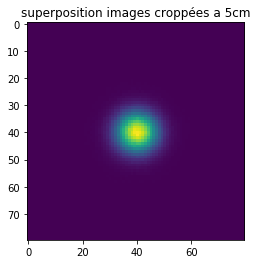

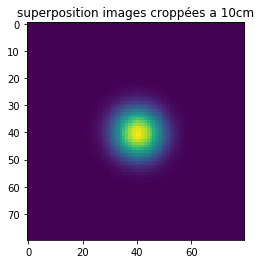

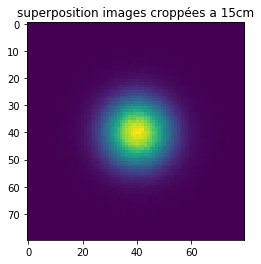

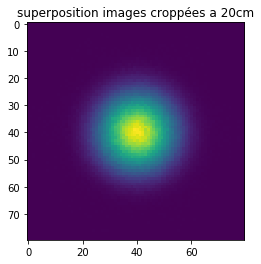

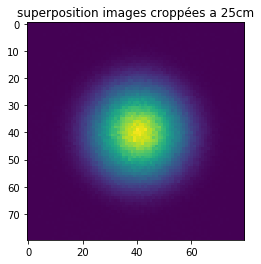

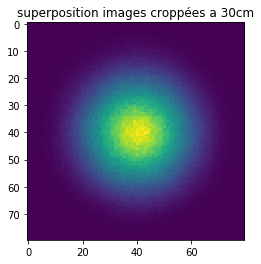

In [7]:
##### distance de 5cm #####
partiestot0 = cropImg(img0) + cropImg(img1) + cropImg(img2) + cropImg(img3) + cropImg(img4)
plt.title('superposition images croppées a 5cm')
plt.imshow(partiestot0)
plt.show()

##### distance de 10cm #####
partiestot1 = cropImg(img01) + cropImg(img11) + cropImg(img21) + cropImg(img31) + cropImg(img41)
plt.title('superposition images croppées a 10cm')
plt.imshow(partiestot1)
plt.show()

##### distance de 15cm #####
partiestot2 = cropImg(img02) + cropImg(img12) + cropImg(img22) + cropImg(img32) + cropImg(img24)
plt.title('superposition images croppées a 15cm')
plt.imshow(partiestot2)
plt.show()
                                                                                          
##### distance de 20cm #####
partiestot3 = cropImg(img03) + cropImg(img13) + cropImg(img23) + cropImg(img33) + cropImg(img43)
plt.title('superposition images croppées a 20cm')
plt.imshow(partiestot3)
plt.show()
                                                                                          
##### distance de 25cm #####
partiestot4 = cropImg(img04) + cropImg(img14) + cropImg(img24) + cropImg(img34) + cropImg(img44)
plt.title('superposition images croppées a 25cm')
plt.imshow(partiestot4)
plt.show()
                                                                                          
##### distance de 30cm #####
partie05 = cropImg(img05)
partie15 = cropImg(img15)
partie25 = cropImg(img25)
partie35 = cropImg(img35)
partie45 = cropImg(img45)
partiestot5 = cropImg(img05) + cropImg(img15) + cropImg(img25) + cropImg(img35) + cropImg(img45)
plt.title('superposition images croppées a 30cm')
plt.imshow(partiestot5)
plt.show()

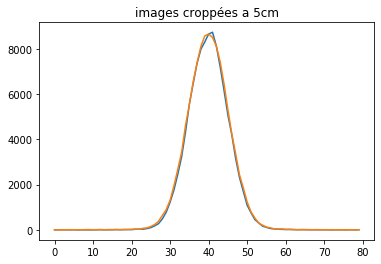

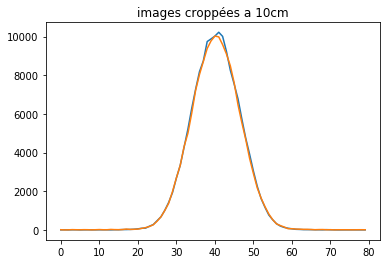

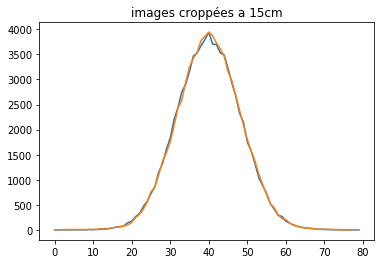

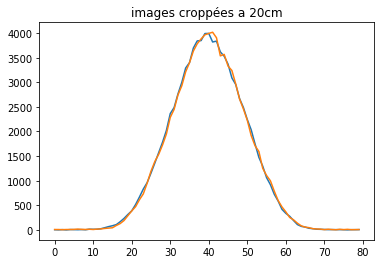

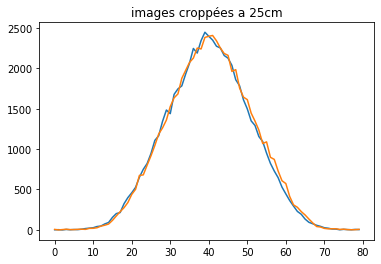

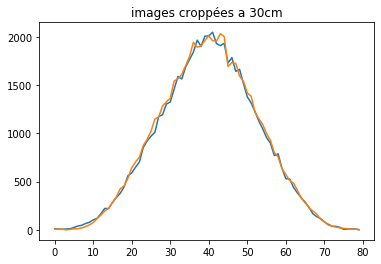

In [8]:
##### distance de 5cm #####
plt.title('images croppées a 5cm')
plt.plot(partiestot0[:,40])
plt.plot(partiestot0[40,:])
plt.show()

##### distance de 10cm #####
plt.title('images croppées a 10cm')
plt.plot(partiestot1[:,40])
plt.plot(partiestot1[40,:])
plt.show()

##### distance de 15cm #####
plt.title('images croppées a 15cm')
plt.plot(partiestot2[:,40])
plt.plot(partiestot2[40,:])
plt.show()


##### distance de 20cm #####
plt.title('images croppées a 20cm')
plt.plot(partiestot3[:,40])
plt.plot(partiestot3[40,:])
plt.show()

##### distance de 25cm #####
plt.title('images croppées a 25cm')
plt.plot(partiestot4[:,40])
plt.plot(partiestot4[40,:])
plt.show()


##### distance de 30cm #####
plt.title('images croppées a 30cm')
plt.plot(partiestot5[:,40])
plt.plot(partiestot5[40,:])
plt.show()


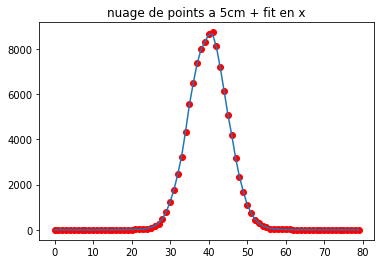

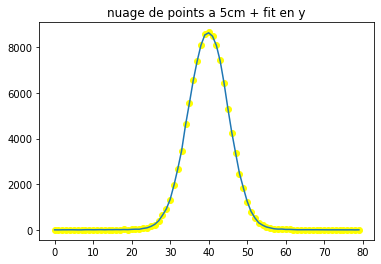

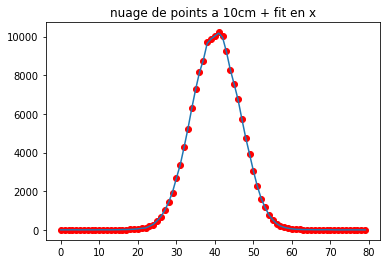

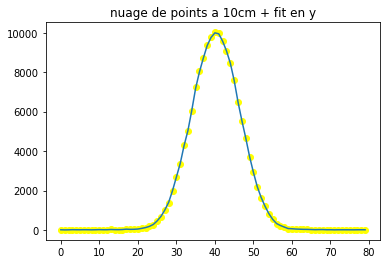

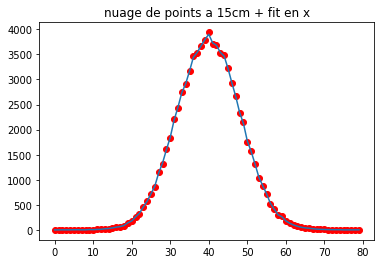

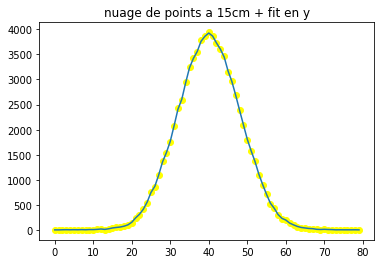

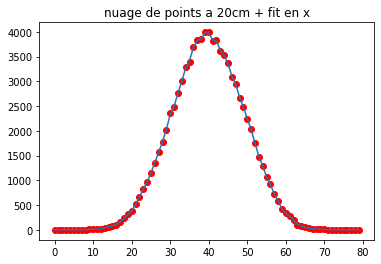

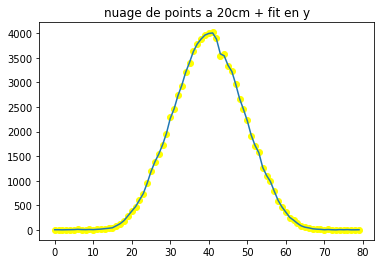

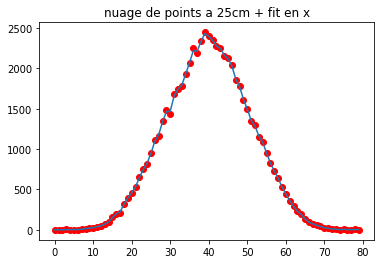

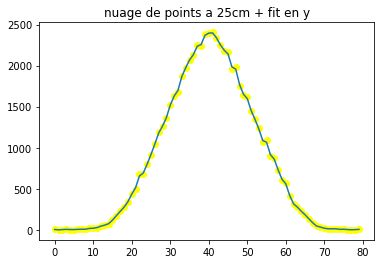

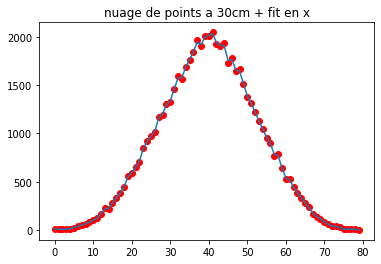

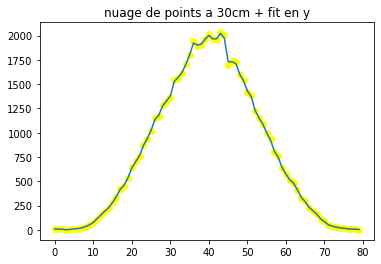

In [9]:
abcisse = np.arange(0, 80, 1)

##### distance de 5cm #####
#En X
plt.title('nuage de points a 5cm + fit en x')
plt.scatter(abcisse, partiestot0[:,40], c = 'red')
FITX = scipy.ndimage.filters.gaussian_filter(partiestot0[:,40], 0.5, mode='nearest')
plt.plot(FITX)
plt.show()
#En Y
plt.title('nuage de points a 5cm + fit en y')
plt.scatter(abcisse, partiestot0[40,:], c = 'yellow')
FITY = scipy.ndimage.filters.gaussian_filter(partiestot0[40,:], 0.5, mode='nearest')
plt.plot(FITY)
plt.show()


##### distance de 10cm #####
#En X
plt.title('nuage de points a 10cm + fit en x')
plt.scatter(abcisse, partiestot1[:,40], c = 'red')
FITX1 = scipy.ndimage.filters.gaussian_filter(partiestot1[:,40], 0.5, mode='nearest')
plt.plot(FITX1)
plt.show()
#En Y
plt.title('nuage de points a 10cm + fit en y')
plt.scatter(abcisse, partiestot1[40,:], c = 'yellow')
FITY1 = scipy.ndimage.filters.gaussian_filter(partiestot1[40,:], 0.5, mode='nearest')
plt.plot(FITY1)
plt.show()

##### distance de 15cm #####
#En X
plt.title('nuage de points a 15cm + fit en x')
plt.scatter(abcisse, partiestot2[:,40], c = 'red')
FITX2 = scipy.ndimage.filters.gaussian_filter(partiestot2[:,40], 0.5, mode='nearest')
plt.plot(FITX2)
plt.show()
#En Y
plt.title('nuage de points a 15cm + fit en y')
plt.scatter(abcisse, partiestot2[40,:], c = 'yellow')
FITY2 = scipy.ndimage.filters.gaussian_filter(partiestot2[40,:], 0.5, mode='nearest')
plt.plot(FITY2)
plt.show()

##### distance de 20cm #####
#En X
plt.title('nuage de points a 20cm + fit en x')
plt.scatter(abcisse, partiestot3[:,40], c = 'red')
FITX3 = scipy.ndimage.filters.gaussian_filter(partiestot3[:,40], 0.5, mode='nearest')
plt.plot(FITX3)
plt.show()
#En Y
plt.title('nuage de points a 20cm + fit en y')
plt.scatter(abcisse, partiestot3[40,:], c = 'yellow')
FITY3 = scipy.ndimage.filters.gaussian_filter(partiestot3[40,:], 0.5, mode='nearest')
plt.plot(FITY3)
plt.show()

##### distance de 25cm #####
#En X
plt.title('nuage de points a 25cm + fit en x')
plt.scatter(abcisse, partiestot4[:,40], c = 'red')
FITX4 = scipy.ndimage.filters.gaussian_filter(partiestot4[:,40], 0.5, mode='nearest')
plt.plot(FITX4)
plt.show()
#En Y
plt.title('nuage de points a 25cm + fit en y')
plt.scatter(abcisse, partiestot4[40,:], c = 'yellow')
FITY4 = scipy.ndimage.filters.gaussian_filter(partiestot4[40,:], 0.5, mode='nearest')
plt.plot(FITY4)
plt.show()

##### distance de 30cm #####
#En X
plt.title('nuage de points a 30cm + fit en x')
plt.scatter(abcisse, partiestot5[:,40], c = 'red')
FITX5 = scipy.ndimage.filters.gaussian_filter(partiestot5[:,40], 0.5, mode='nearest')
plt.plot(FITX5)
plt.show()
#En Y
plt.title('nuage de points a 30cm + fit en y')
plt.scatter(abcisse, partiestot5[40,:], c = 'yellow')
FITY5 = scipy.ndimage.filters.gaussian_filter(partiestot5[40,:], 0.5, mode='nearest')
plt.plot(FITY5)
plt.show()

The offset of the gaussian baseline is -18293.93318597887
The center of the gaussian fit is 28351.88389378869
The sigma of the gaussian fit is 23332.014753170966
The maximum intensity of the gaussian fit is 20007.462753413845
The Amplitude of the gaussian fit is 38301.395939392714
The FWHM of the gaussian fit en X is 12885.548455718977
The FWHM of the gaussian fit en Y is 12885.548455718977


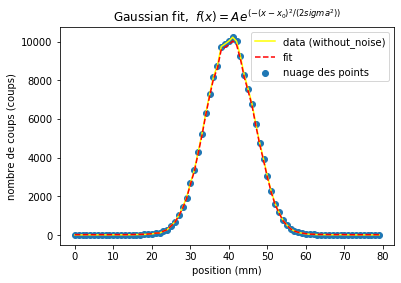

The offset of the gaussian baseline is -18293.93318597887
The center of the gaussian fit is 28351.88389378869
The sigma of the gaussian fit is 23332.014753170966
The maximum intensity of the gaussian fit is 20007.462753413845
The Amplitude of the gaussian fit is 38301.395939392714
The FWHM of the gaussian fit en X is 12885.548455718977
The FWHM of the gaussian fit en Y is 12885.548455718977


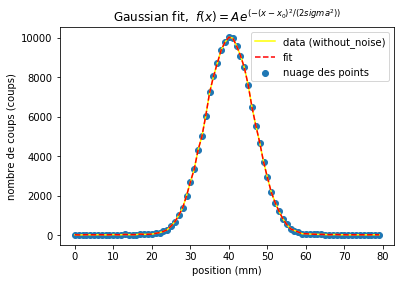

In [31]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    #popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y)], sigma, method='lm')
    #popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y)], sigma)
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y),mean, sigma])
    return popt
#En X
XCord = partiestot1[:,40]
YCord = partiestot1[40,:]
ydata_perfect = gauss(partiestot1[:,40], 20, 5, 6, 1)  ##a comprendre, sinn a enlever
H, A, x0, sigma = gauss_fit(XCord, YCord)
FWHMXG = float(pixSize[0]) * sigma
FWHMYG = float(pixSize[1]) * sigma

print('The offset of the gaussian baseline is', H)
print('The center of the gaussian fit is', x0)
print('The sigma of the gaussian fit is', sigma)
print('The maximum intensity of the gaussian fit is', H + A)
print('The Amplitude of the gaussian fit is', A)
print('The FWHM of the gaussian fit en X is', FWHMXG)
print('The FWHM of the gaussian fit en Y is', FWHMYG)

#plt.plot(abcisse, XCord, 'ko', label='data')
plt.scatter(abcisse, partiestot1[:,40], label='nuage des points')
plt.plot(abcisse, partiestot1[:,40], '-k', label='data (without_noise)', c = 'yellow') ### ydata_perfect a comprendre
#plt.plot(abcisse, gauss(XCord, *gauss_fit(XCord, YCord)), '--r', label='fit')
plt.plot(abcisse, gauss(XCord, *gauss_fit(partiestot1[:,40], YCord)), '--r', label='fit')

plt.legend()
plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
plt.xlabel('position (mm)')   
plt.ylabel('nombre de coups (coups)')
plt.show()


#En Y
XCord = partiestot1[:,40]
YCord = partiestot1[40,:]
ydata_perfect = gauss(partiestot1[40,:], 20, 5, 6, 1)  ##a comprendre, sinn a enlever
H, A, x0, sigma = gauss_fit(XCord, YCord)
FWHMXG = float(pixSize[0]) * sigma
FWHMYG = float(pixSize[1]) * sigma
print('The offset of the gaussian baseline is', H)
print('The center of the gaussian fit is', x0)
print('The sigma of the gaussian fit is', sigma)
print('The maximum intensity of the gaussian fit is', H + A)
print('The Amplitude of the gaussian fit is', A)
print('The FWHM of the gaussian fit en X is', FWHMXG)
print('The FWHM of the gaussian fit en Y is', FWHMYG)

plt.scatter(abcisse, partiestot1[40,:], label='nuage des points')
plt.plot(abcisse, partiestot1[40,:], '-k', label='data (without_noise)', c = 'yellow') ### ydata_perfect a comprendre
#plt.plot(abcisse, gauss(XCord, *gauss_fit(XCord, YCord)), '--r', label='fit')
plt.plot(abcisse, gauss(YCord, *gauss_fit(partiestot1[40,:], YCord)), '--r', label='fit')

plt.legend()
plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
plt.xlabel('position (mm)')   
plt.ylabel('nombre de coups (coups)')
plt.show()



In [25]:
#En X
XCord = partiestot2[:,40]
YCord = partiestot2[40,:]
ydata_perfect = gauss(partiestot2[:,40], 20, 5, 6, 1)  ##a comprendre, sinn a enlever
H, A, x0, sigma = gauss_fit(XCord, YCord)
FWHMXG = float(pixSize[0]) * sigma
FWHMYG = float(pixSize[1]) * sigma

print('The offset of the gaussian baseline is', H)
print('The center of the gaussian fit is', x0)
print('The sigma of the gaussian fit is', sigma)
print('The maximum intensity of the gaussian fit is', H + A)
print('The Amplitude of the gaussian fit is', A)
print('The FWHM of the gaussian fit en X is', FWHMXG)
print('The FWHM of the gaussian fit en Y is', FWHMYG)

#plt.plot(abcisse, XCord, 'ko', label='data')
plt.scatter(abcisse, partiestot2[:,40], label='nuage des points')
plt.plot(abcisse, partiestot2[:,40], '-k', label='data (without_noise)', c = 'yellow') ### ydata_perfect a comprendre
#plt.plot(abcisse, gauss(XCord, *gauss_fit(XCord, YCord)), '--r', label='fit')
plt.plot(abcisse, gauss(XCord, *gauss_fit(partiestot2[:,40], YCord)), '--r', label='fit')

plt.legend()
plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
plt.xlabel('position (mm)')   
plt.ylabel('nombre de coups (coups)')
plt.show()


#En Y
XCord = partiestot2[:,40]
YCord = partiestot2[40,:]
ydata_perfect = gauss(partiestot2[40,:], 20, 5, 6, 1)  ##a comprendre, sinn a enlever
H, A, x0, sigma = gauss_fit(XCord, YCord)
FWHMXG = float(pixSize[0]) * sigma
FWHMYG = float(pixSize[1]) * sigma
print('The offset of the gaussian baseline is', H)
print('The center of the gaussian fit is', x0)
print('The sigma of the gaussian fit is', sigma)
print('The maximum intensity of the gaussian fit is', H + A)
print('The Amplitude of the gaussian fit is', A)
print('The FWHM of the gaussian fit en X is', FWHMXG)
print('The FWHM of the gaussian fit en Y is', FWHMYG)

plt.scatter(abcisse, partiestot2[40,:], label='nuage des points')
plt.plot(abcisse, partiestot2[40,:], '-k', label='data (without_noise)', c = 'yellow') ### ydata_perfect a comprendre
#plt.plot(abcisse, gauss(XCord, *gauss_fit(XCord, YCord)), '--r', label='fit')
plt.plot(abcisse, gauss(YCord, *gauss_fit(partiestot2[40,:], YCord)), '--r', label='fit')

plt.legend()
plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
plt.xlabel('position (mm)')   
plt.ylabel('nombre de coups (coups)')
plt.show()



RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [26]:
#En X
XCord = partiestot3[:,40]
YCord = partiestot3[40,:]
ydata_perfect = gauss(partiestot3[:,40], 20, 5, 6, 1)  ##a comprendre, sinn a enlever
H, A, x0, sigma = gauss_fit(XCord, YCord)
FWHMXG = float(pixSize[0]) * sigma
FWHMYG = float(pixSize[1]) * sigma

print('The offset of the gaussian baseline is', H)
print('The center of the gaussian fit is', x0)
print('The sigma of the gaussian fit is', sigma)
print('The maximum intensity of the gaussian fit is', H + A)
print('The Amplitude of the gaussian fit is', A)
print('The FWHM of the gaussian fit en X is', FWHMXG)
print('The FWHM of the gaussian fit en Y is', FWHMYG)

#plt.plot(abcisse, XCord, 'ko', label='data')
plt.scatter(abcisse, partiestot3[:,40], label='nuage des points')
plt.plot(abcisse, partiestot3[:,40], '-k', label='data (without_noise)', c = 'yellow') ### ydata_perfect a comprendre
#plt.plot(abcisse, gauss(XCord, *gauss_fit(XCord, YCord)), '--r', label='fit')
plt.plot(abcisse, gauss(XCord, *gauss_fit(partiestot3[:,40], YCord)), '--r', label='fit')

plt.legend()
plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
plt.xlabel('position (mm)')   
plt.ylabel('nombre de coups (coups)')
plt.show()


#En Y
XCord = partiestot3[:,40]
YCord = partiestot3[40,:]
ydata_perfect = gauss(partiestot3[40,:], 20, 5, 6, 1)  ##a comprendre, sinn a enlever
H, A, x0, sigma = gauss_fit(XCord, YCord)
FWHMXG = float(pixSize[0]) * sigma
FWHMYG = float(pixSize[1]) * sigma
print('The offset of the gaussian baseline is', H)
print('The center of the gaussian fit is', x0)
print('The sigma of the gaussian fit is', sigma)
print('The maximum intensity of the gaussian fit is', H + A)
print('The Amplitude of the gaussian fit is', A)
print('The FWHM of the gaussian fit en X is', FWHMXG)
print('The FWHM of the gaussian fit en Y is', FWHMYG)

plt.scatter(abcisse, partiestot3[40,:], label='nuage des points')
plt.plot(abcisse, partiestot3[40,:], '-k', label='data (without_noise)', c = 'yellow') ### ydata_perfect a comprendre
#plt.plot(abcisse, gauss(XCord, *gauss_fit(XCord, YCord)), '--r', label='fit')
plt.plot(abcisse, gauss(YCord, *gauss_fit(partiestot3[40,:], YCord)), '--r', label='fit')

plt.legend()
plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
plt.xlabel('position (mm)')   
plt.ylabel('nombre de coups (coups)')
plt.show()



RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

The offset of the gaussian baseline is -3499.0235973786066
The center of the gaussian fit is 4138.357118353438
The sigma of the gaussian fit is 3725.0453090659403
The maximum intensity of the gaussian fit is 2971.4266817204816
The Amplitude of the gaussian fit is 6470.450279099088
The FWHM of the gaussian fit en X is 2057.2270477925376
The FWHM of the gaussian fit en Y is 2057.2270477925376


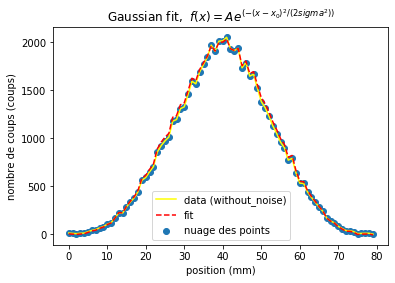

The offset of the gaussian baseline is -3499.0235973786066
The center of the gaussian fit is 4138.357118353438
The sigma of the gaussian fit is 3725.0453090659403
The maximum intensity of the gaussian fit is 2971.4266817204816
The Amplitude of the gaussian fit is 6470.450279099088
The FWHM of the gaussian fit en X is 2057.2270477925376
The FWHM of the gaussian fit en Y is 2057.2270477925376


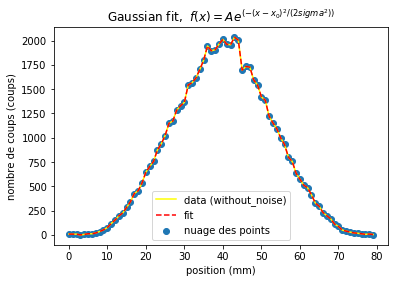

In [19]:
#En X
XCord = partiestot5[:,40]
YCord = partiestot5[40,:]
ydata_perfect = gauss(partiestot5[:,40], 20, 5, 6, 1)  ##a comprendre, sinn a enlever
H, A, x0, sigma = gauss_fit(XCord, YCord)
FWHMXG = float(pixSize[0]) * sigma
FWHMYG = float(pixSize[1]) * sigma

print('The offset of the gaussian baseline is', H)
print('The center of the gaussian fit is', x0)
print('The sigma of the gaussian fit is', sigma)
print('The maximum intensity of the gaussian fit is', H + A)
print('The Amplitude of the gaussian fit is', A)
print('The FWHM of the gaussian fit en X is', FWHMXG)
print('The FWHM of the gaussian fit en Y is', FWHMYG)

#plt.plot(abcisse, XCord, 'ko', label='data')
plt.scatter(abcisse, partiestot5[:,40], label='nuage des points')
plt.plot(abcisse, partiestot5[:,40], '-k', label='data (without_noise)', c = 'yellow') ### ydata_perfect a comprendre
#plt.plot(abcisse, gauss(XCord, *gauss_fit(XCord, YCord)), '--r', label='fit')
plt.plot(abcisse, gauss(XCord, *gauss_fit(partiestot5[:,40], YCord)), '--r', label='fit')

plt.legend()
plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
plt.xlabel('position (mm)')   
plt.ylabel('nombre de coups (coups)')
plt.show()


#En Y
XCord = partiestot5[:,40]
YCord = partiestot5[40,:]
ydata_perfect = gauss(partiestot5[40,:], 20, 5, 6, 1)  ##a comprendre, sinn a enlever
H, A, x0, sigma = gauss_fit(XCord, YCord)
FWHMXG = float(pixSize[0]) * sigma
FWHMYG = float(pixSize[1]) * sigma
print('The offset of the gaussian baseline is', H)
print('The center of the gaussian fit is', x0)
print('The sigma of the gaussian fit is', sigma)
print('The maximum intensity of the gaussian fit is', H + A)
print('The Amplitude of the gaussian fit is', A)
print('The FWHM of the gaussian fit en X is', FWHMXG)
print('The FWHM of the gaussian fit en Y is', FWHMYG)

plt.scatter(abcisse, partiestot5[40,:], label='nuage des points')
plt.plot(abcisse, partiestot5[40,:], '-k', label='data (without_noise)', c = 'yellow') ### ydata_perfect a comprendre
#plt.plot(abcisse, gauss(XCord, *gauss_fit(XCord, YCord)), '--r', label='fit')
plt.plot(abcisse, gauss(YCord, *gauss_fit(partiestot5[40,:], YCord)), '--r', label='fit')

plt.legend()
plt.title('Gaussian fit,  $f(x) = A e^{(-(x-x_0)^2/(2sigma^2))}$')
plt.xlabel('position (mm)')   
plt.ylabel('nombre de coups (coups)')
plt.show()



In [12]:
#abcisse = np.arange(0, 80, 1)

##### distance de 5cm #####
halfmaxtotx = half_max(abcisse, partiestot0[:,40])
halfmaxtoty = half_max(abcisse, partiestot0[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop = halfmaxtotx[1] - halfmaxtotx[0] * float(pixSize[0])
fwhmYcrop = halfmaxtoty[1] - halfmaxtoty[0] * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmXcrop = ', fwhmXcrop, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmYcrop = ', fwhmYcrop, 'mm')


##### distance de 10cm #####
halfmaxtotx1 = half_max(abcisse, partiestot1[:,40])
halfmaxtoty1 = half_max(abcisse, partiestot1[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop1 = halfmaxtotx1[1] - halfmaxtotx1[0] * float(pixSize[0])
fwhmYcrop1 = halfmaxtoty1[1] - halfmaxtoty1[0] * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmXcrop = ', fwhmXcrop1, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmYcrop = ', fwhmYcrop1, 'mm')


##### distance de 15cm #####
halfmaxtotx2 = half_max(abcisse, partiestot2[:,40])
halfmaxtoty2 = half_max(abcisse, partiestot2[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop2 = halfmaxtotx2[1] - halfmaxtotx2[0] * float(pixSize[0])
fwhmYcrop2 = halfmaxtoty2[1] - halfmaxtoty2[0] * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmXcrop = ', fwhmXcrop2, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmYcrop = ', fwhmYcrop2, 'mm')


##### distance de 20cm #####
halfmaxtotx3 = half_max(abcisse, partiestot3[:,40])
halfmaxtoty3 = half_max(abcisse, partiestot3[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop3 = halfmaxtotx3[1] - halfmaxtotx3[0] * float(pixSize[0])
fwhmYcrop3 = halfmaxtoty3[1] - halfmaxtoty3[0] * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmXcrop = ', fwhmXcrop3, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmYcrop = ', fwhmYcrop3, 'mm')


##### distance de 25cm #####
halfmaxtotx4 = half_max(abcisse, partiestot4[:,40])
halfmaxtoty4 = half_max(abcisse, partiestot4[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop4 = halfmaxtotx4[1] - halfmaxtotx4[0] * float(pixSize[0])
fwhmYcrop4 = halfmaxtoty4[1] - halfmaxtoty4[0] * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmXcrop = ', fwhmXcrop4, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmYcrop = ', fwhmYcrop4, 'mm')


##### distance de 30cm #####
halfmaxtotx5 = half_max(abcisse, partiestot5[:,40])
halfmaxtoty5 = half_max(abcisse, partiestot4[40,:])
#la largeur à mi-hauteur des images cropées:
fwhmXcrop5 = halfmaxtotx5[1] - halfmaxtotx5[0] * float(pixSize[0])
fwhmYcrop5 = halfmaxtoty5[1] - halfmaxtoty5[0] * float(pixSize[1])
print('la largeur a mi-hauteur de l image cropée en X à 30cm est fwhmXcrop = ', fwhmXcrop5, 'mm')
print('la largeur a mi-hauteur de l image cropée en X à 30cm est fwhmYcrop = ', fwhmYcrop5, 'mm')

la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmXcrop =  27.020618156276598 mm
la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmYcrop =  27.29267917757222 mm
la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmXcrop =  29.47152210156149 mm
la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmYcrop =  29.386510423022383 mm
la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmXcrop =  32.670240413778515 mm
la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmYcrop =  32.48967282254512 mm
la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmXcrop =  35.18098946936189 mm
la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmYcrop =  34.59704755233692 mm
la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmXcrop =  37.41243381481178 mm
la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmYcrop =  38.156819911203904 mm
la largeur a mi-hauteur de l image cropée en X à 30cm est fwhmXcrop =  39.8424

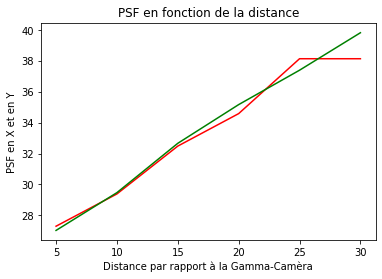

In [13]:
Distance = np.array([5, 10, 15, 20, 25, 30])
PSFX = np.array([fwhmXcrop, fwhmXcrop1, fwhmXcrop2, fwhmXcrop3, fwhmXcrop4, fwhmXcrop5])
PSFY = np.array([fwhmYcrop, fwhmYcrop1, fwhmYcrop2, fwhmYcrop3, fwhmYcrop4, fwhmYcrop5])

plt.title('PSF en fonction de la distance')
plt.plot(Distance, PSFY, c = 'red')
plt.plot(Distance, PSFX, c = 'green')
plt.xlabel("Distance par rapport à la Gamma-Camèra")
plt.ylabel("PSF en X et en Y")
plt.show()
